# **Import modules**

In [1]:
# Clear files if ran again
!rm -rf /kaggle/working/*

In [2]:
#YOLOv8
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.7/802.7 kB 22.4 MB/s eta 0:00:00


In [3]:
# YOLOv10
!pip install -q git+https://github.com/THU-MIG/yolov10.git
!mkdir -p /kaggle/working/yolov10/weights
!wget -P /kaggle/working/yolov10/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt

In [4]:
!pip install supervision
import supervision
import ultralytics
from ultralytics import YOLO, YOLOv10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import PIL 
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2
import warnings
import os
warnings.simplefilter('ignore')
os.environ['WANDB_DISABLED'] = 'true'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 4.1 MB/s eta 0:00:00


In [5]:
class CFG:
    EPOCHS = 50
    BATCH_SIZE = 32
    SEED = 6
    LEARNING_RATE = 0.001
    NUM_SAMPLES = 16
    OPTIMIZER = 'Adam'
    
    DATA_PATH = '/kaggle/input/kidney-stone-images/data.yaml'
    SAMPLE_PATH = '/kaggle/input/kidney-stone-images/test/images/*'

# **Import dataset**

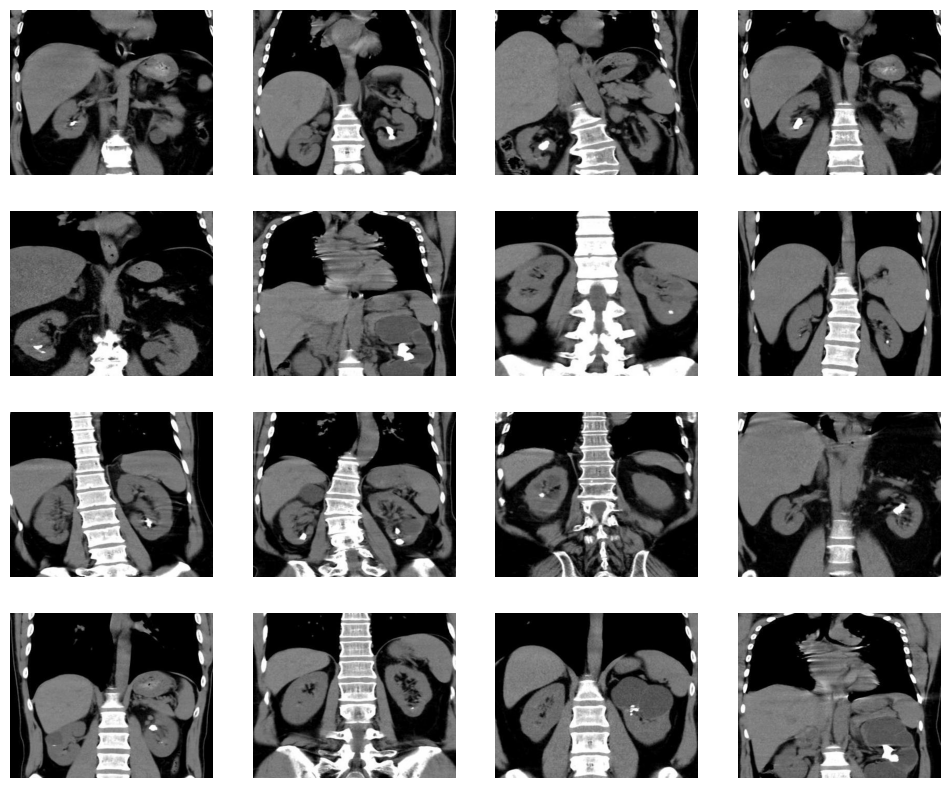

In [6]:
images_data = glob(CFG.SAMPLE_PATH)
random_image = random.sample(images_data, CFG.NUM_SAMPLES)

plt.figure(figsize=(12,10))
for i in range(CFG.NUM_SAMPLES):
    plt.subplot(4,4,i+1)
    plt.imshow(cv2.imread(random_image[i]))
    plt.axis('off')

# **Train models**

In [7]:
yolo_v8 = YOLO('yolov8m.pt')
yolo_v10 = YOLOv10('/kaggle/working/yolov10/weights/yolov10m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 256MB/s]


In [8]:
v8_model = yolo_v8.train(data=CFG.DATA_PATH,seed=CFG.SEED,epochs=CFG.EPOCHS, lr0=CFG.LEARNING_RATE, optimizer=CFG.OPTIMIZER, verbose=True,
    project='ft_models',  
    name='yolo_v8')

New https://pypi.org/project/ultralytics/8.2.58 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/input/kidney-stone-images/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=ft_models, name=yolo_v8, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=6, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False,

100%|██████████| 755k/755k [00:00<00:00, 21.9MB/s]
2024-07-16 09:56:46,162	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-16 09:56:46,971	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-16 09:56:49.533715: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-16 09:56:49.533819: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-16 09:56:49.688114: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

wandb: Tracking run with wandb version 0.17.0
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 108MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/kidney-stone-images/train/labels... 1054 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1054/1054 [00:04<00:00, 237.34it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/kidney-stone-images/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/kidney-stone-images/valid/labels... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<00:00, 236.38it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/kidney-stone-images/valid is not writeable, cache not saved.


Plotting labels to ft_models/yolo_v8/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to ft_models/yolo_v8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.45G      2.304        3.1      1.389         63        640: 100%|██████████| 66/66 [00:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]

                   all        123        325      0.565      0.492      0.492      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.77G      2.154       1.22      1.321         42        640: 100%|██████████| 66/66 [00:31<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        123        325       0.58      0.539      0.466      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.71G      2.134      1.198      1.303         41        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        123        325       0.66      0.594      0.582      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.74G      2.099       1.17      1.268         26        640: 100%|██████████| 66/66 [00:32<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325      0.691      0.508      0.544      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.74G      2.109      1.273      1.293         37        640: 100%|██████████| 66/66 [00:31<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        123        325      0.659       0.59      0.621      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.74G      2.068      1.131      1.267         38        640: 100%|██████████| 66/66 [00:31<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325      0.698      0.628      0.645      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.74G      2.091      1.135      1.292         45        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        123        325      0.725      0.643      0.662       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.73G      2.094       1.13      1.274         46        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325      0.548       0.48      0.524      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.74G      2.053      1.093      1.266         46        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325      0.759      0.678      0.695      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.78G      2.001      1.038      1.251         35        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        123        325      0.728      0.689      0.703      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.74G       2.01      1.064      1.238         40        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325      0.713       0.62      0.633      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.75G      2.007      1.026      1.232         58        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        123        325       0.67      0.674      0.649      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.74G      1.995      1.041      1.223         49        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        123        325      0.819      0.671      0.718      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.75G      2.004      1.068      1.228         56        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325      0.732      0.664      0.685      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.74G      1.978      1.035      1.253         52        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325      0.735      0.637      0.633      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.75G      1.978       1.01      1.219         40        640: 100%|██████████| 66/66 [00:31<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325      0.753      0.646      0.694      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.76G      1.962      1.003      1.207         37        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325      0.778      0.714      0.718      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.76G      1.932     0.9843      1.201         60        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325      0.791      0.673      0.705       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.74G      1.938     0.9525      1.187         68        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325      0.784      0.662      0.702      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.73G       1.93     0.9708      1.187         38        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        123        325      0.788      0.658      0.699      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.74G      1.927     0.9995      1.176         52        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325      0.759      0.702      0.735      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.76G      1.897     0.9612      1.177         38        640: 100%|██████████| 66/66 [00:31<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325      0.762      0.686      0.728      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.77G      1.915     0.9711      1.192         47        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        123        325      0.797      0.695      0.726      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.78G      1.885     0.9578      1.166         57        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325      0.796       0.71      0.749      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.77G      1.875     0.9386      1.157         55        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325       0.84      0.681      0.731      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.76G      1.852     0.9105      1.161         30        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        123        325      0.764      0.687      0.682      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.74G      1.894     0.9497      1.164         26        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        123        325       0.78      0.666      0.672      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.73G      1.845     0.9248      1.154         42        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325      0.725       0.69      0.707      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.74G      1.808     0.8985      1.137         50        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        123        325      0.802      0.724      0.743      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.73G      1.786     0.8577      1.129         27        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325      0.805      0.692      0.713      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.74G      1.818     0.8727      1.126         53        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        123        325      0.779      0.717      0.765      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.77G      1.786      0.847      1.135         51        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        123        325      0.836      0.692      0.745      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.74G      1.782     0.8645      1.139         60        640: 100%|██████████| 66/66 [00:31<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325      0.817      0.692      0.753      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.73G      1.759     0.8225      1.122         50        640: 100%|██████████| 66/66 [00:31<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325       0.78      0.686      0.735        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.77G       1.74     0.8524      1.118         41        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        123        325      0.812      0.692      0.747      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.76G      1.751     0.8214      1.108         50        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        123        325      0.797      0.692      0.725      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.78G      1.721     0.8083      1.105         38        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        123        325      0.778      0.711      0.736      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.78G      1.727     0.8069      1.101         47        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        123        325      0.824      0.733      0.772      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.76G      1.681     0.7901      1.089         38        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325      0.826      0.698      0.744      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.77G      1.705     0.8104      1.085         43        640: 100%|██████████| 66/66 [00:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        123        325       0.79      0.674      0.728      0.289


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.74G      1.687     0.8044      1.121         20        640: 100%|██████████| 66/66 [00:32<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325      0.801      0.695      0.737      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.74G      1.649     0.7666      1.105         28        640: 100%|██████████| 66/66 [00:31<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        123        325      0.815      0.729      0.775       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.75G      1.649     0.7658      1.109         32        640: 100%|██████████| 66/66 [00:31<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325      0.817      0.687      0.737        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.73G      1.615     0.7344      1.099         27        640: 100%|██████████| 66/66 [00:31<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325      0.796      0.717      0.762      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.74G      1.579     0.7292      1.084         26        640: 100%|██████████| 66/66 [00:31<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325      0.832      0.702       0.75      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.73G      1.569     0.7125       1.07         28        640: 100%|██████████| 66/66 [00:31<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        123        325      0.827      0.705      0.751      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.77G      1.567     0.6977      1.075         33        640: 100%|██████████| 66/66 [00:31<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        123        325      0.821      0.692       0.75       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.74G      1.548     0.6974       1.06         23        640: 100%|██████████| 66/66 [00:31<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        123        325      0.787      0.716      0.749      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.74G      1.533     0.6984      1.066         29        640: 100%|██████████| 66/66 [00:31<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        123        325      0.805      0.705      0.766      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.75G      1.511     0.6827       1.06         23        640: 100%|██████████| 66/66 [00:31<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        123        325      0.836      0.692      0.766      0.305



50 epochs completed in 0.509 hours.
Optimizer stripped from ft_models/yolo_v8/weights/last.pt, 52.0MB
Optimizer stripped from ft_models/yolo_v8/weights/best.pt, 52.0MB

Validating ft_models/yolo_v8/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.30s/it]


                   all        123        325      0.779      0.717      0.765      0.328
Speed: 0.2ms preprocess, 18.1ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to ft_models/yolo_v8


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 █▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:                  lr/pg1 ▃▆████▇▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:                  lr/pg2 ▃▆████▇▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:        metrics/mAP50(B) ▂▁▄▃▅▅▂▆▅▅▇▆▆▇▆▆▇▇▇▇▆▆▆▇█▇█▇▇▇█▇▇█▇█▇▇▇█
wandb:     metrics/mAP50-95(B) ▂▁▂▂▅▅▂▅▅▄▆▆▅▇▆▇▆▇▇▇▅▄▆▆██▇▇▇▇▇▆▇█▇▇▇▇▆█
wandb:    metrics/precision(B) ▁▂▄▄▅▅▁▆▅▄█▅▆▇▇▇▆▆▇▇▆▇▅▇▇██▇▇▇██▇▇█▇██▇▇
wandb:       metrics/recall(B) ▁▃▄▂▅▆▁▆▅▆▆▆▆▇▆▆▇▇▇▇▇▆▇██▇▇▇▇▇█▇▇█▇█▇▇██
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▇▇▆▆▆▆▆▅▅▅▅▅▅▅▅▅▄▅▄▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▁▁▁
wandb:          train/cls_loss █▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:          train/dfl_loss █▇▆▅▅▆▆▅▅▅▄▅▄▄▄▄▃▃▄▃▃▃▃▃▂▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁
wandb:            val/box_loss ▅▇▄▆▃▃█▅▃▃▃▁▃▁▃▂▄▂▃▂▅▆▂▃▁▃▂▃▄▃▂▃▂▃▄

In [9]:
v10_model = yolo_v10.train(data=CFG.DATA_PATH,seed=CFG.SEED,epochs=CFG.EPOCHS, lr0=CFG.LEARNING_RATE, optimizer=CFG.OPTIMIZER, verbose=True,
    project='ft_models',  
    name='yolo_v10')

New https://pypi.org/project/ultralytics/8.2.58 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/yolov10/weights/yolov10m.pt, data=/kaggle/input/kidney-stone-images/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=ft_models, name=yolo_v10, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=6, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False,

wandb: Tracking run with wandb version 0.17.0
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/kidney-stone-images/train/labels... 1054 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1054/1054 [00:01<00:00, 842.71it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/kidney-stone-images/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/input/kidney-stone-images/valid/labels... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<00:00, 804.54it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/kidney-stone-images/valid is not writeable, cache not saved.


Plotting labels to ft_models/yolo_v10/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.0005), 141 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to ft_models/yolo_v10
Starting training for 50 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       1/50      10.9G      2.286      2.301      1.421      2.584      2.943      1.263         63        640: 100%|██████████| 66/66 [00:39<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.33it/s]

                   all        123        325      0.381      0.357      0.261     0.0908



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       2/50      11.1G      2.177      1.268      1.353      2.485      1.455      1.224         42        640: 100%|██████████| 66/66 [00:37<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

                   all        123        325      0.389      0.375      0.277     0.0697



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       3/50        11G      2.125      1.257      1.308       2.44       1.39      1.203         41        640: 100%|██████████| 66/66 [00:37<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        123        325      0.588      0.526      0.524      0.187



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       4/50      11.1G      2.143      1.155      1.311      2.449      1.381      1.207         26        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

                   all        123        325      0.652      0.581      0.582      0.207



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       5/50        11G      2.103      1.167      1.311      2.413      1.336      1.207         37        640: 100%|██████████| 66/66 [00:37<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        123        325      0.586      0.514      0.515      0.187



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       6/50      11.1G      2.108      1.124      1.301      2.418      1.334      1.188         38        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        123        325      0.722      0.592      0.619      0.235



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       7/50        11G      2.067      1.129      1.291      2.382      1.321      1.199         45        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        123        325      0.674      0.579      0.614      0.252



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       8/50        11G      2.089      1.128      1.291      2.404      1.301      1.184         46        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        123        325      0.667      0.597      0.604      0.232



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       9/50      11.1G      2.049        1.1      1.268      2.351      1.253      1.175         46        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        123        325      0.704      0.615      0.688      0.256



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      10/50      11.1G      2.034      1.063       1.28      2.333      1.226      1.174         35        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        123        325      0.754      0.632      0.685      0.256



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      11/50        11G      2.041      1.101      1.265      2.363      1.215      1.162         40        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

                   all        123        325      0.653      0.643      0.642      0.254



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      12/50      11.1G      2.033      1.063      1.263      2.304      1.214      1.157         58        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        123        325      0.676      0.579      0.617      0.232



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      13/50        11G      2.035      1.057      1.248      2.278      1.212      1.148         49        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        123        325      0.534      0.486      0.433      0.175



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      14/50      11.1G      2.029      1.053      1.261      2.295      1.218      1.148         56        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        123        325        0.7      0.589      0.645      0.244



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      15/50        11G      2.012      1.049      1.285      2.285      1.237       1.18         52        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        123        325      0.695      0.646      0.643      0.254



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      16/50      11.1G      2.016      1.028      1.263        2.3      1.191       1.15         40        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        123        325      0.759      0.665      0.701       0.29



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      17/50      11.1G      2.003      1.008      1.244      2.305      1.151      1.156         37        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        123        325      0.699      0.618      0.631      0.247



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      18/50      11.1G       1.98      1.007      1.244      2.256      1.195      1.141         60        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        123        325      0.708       0.65      0.676      0.265



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      19/50        11G      1.977     0.9919      1.226      2.263      1.123       1.13         68        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        123        325       0.71      0.612      0.669      0.278



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      20/50        11G      1.972     0.9974      1.218      2.252      1.161      1.128         38        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        123        325      0.771      0.668      0.736      0.308



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      21/50        11G      1.964     0.9904      1.217      2.256      1.119       1.12         52        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

                   all        123        325      0.738      0.674      0.747      0.294



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      22/50      11.1G      1.907     0.9573       1.21      2.222      1.075      1.135         38        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        123        325      0.683      0.643      0.662      0.242



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      23/50      11.1G      1.962      0.972      1.239      2.261      1.121      1.141         47        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        123        325      0.744      0.689      0.716      0.274



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      24/50      11.1G      1.938     0.9671      1.217      2.281      1.109      1.129         57        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        123        325      0.818      0.664       0.73      0.281



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      25/50      11.1G      1.909     0.9357      1.191      2.233      1.086      1.109         55        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        123        325      0.836      0.706      0.761       0.31



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      26/50        11G      1.906     0.9115      1.211      2.205      1.028      1.127         30        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        123        325      0.734      0.662      0.692      0.274



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      27/50      11.1G      1.937     0.9619      1.204      2.238      1.082      1.117         26        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        123        325      0.789      0.652      0.718       0.28



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      28/50        11G      1.881     0.9165      1.191      2.173      1.031      1.109         42        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        123        325      0.814       0.68      0.748      0.308



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      29/50        11G      1.859     0.9016      1.181      2.159      1.059      1.104         50        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

                   all        123        325      0.804      0.708      0.767      0.312



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      30/50        11G      1.827     0.8911      1.175       2.14      1.033      1.098         27        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        123        325      0.712      0.702      0.714      0.286



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      31/50        11G      1.884     0.9161      1.181      2.186      1.063      1.089         53        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        123        325      0.776      0.708      0.738      0.294



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      32/50      11.1G      1.868     0.8863        1.2      2.166       1.06      1.107         51        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        123        325       0.81      0.649       0.71      0.284



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      33/50        11G       1.86     0.9169      1.185      2.155       1.04      1.108         60        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        123        325       0.76      0.689      0.719      0.295



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      34/50        11G      1.816     0.8699      1.163      2.135     0.9926      1.087         50        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        123        325      0.777      0.687      0.736      0.298



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      35/50      11.1G      1.803     0.8939      1.164      2.159      1.027        1.1         41        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        123        325      0.791      0.683      0.749      0.306



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      36/50      11.1G      1.809      0.855      1.157      2.132     0.9743      1.079         50        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        123        325      0.761      0.694      0.736      0.313



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      37/50      11.1G      1.793     0.8639      1.157      2.122     0.9981      1.084         38        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        123        325      0.785      0.723      0.742      0.292



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      38/50      11.1G      1.806     0.8572      1.163      2.075      1.032      1.081         47        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        123        325        0.7      0.689      0.693      0.272



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      39/50        11G      1.761     0.8529      1.144      2.085     0.9856      1.072         38        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        123        325      0.823      0.699       0.76      0.304



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      40/50      11.1G       1.76     0.8423      1.136      2.088     0.9727      1.069         43        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        123        325      0.771      0.711      0.764      0.293


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      41/50      11.1G      1.779     0.8357      1.186      2.064     0.9769      1.113         20        640: 100%|██████████| 66/66 [00:37<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        123        325      0.745      0.671      0.728      0.295



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      42/50        11G      1.742      0.814       1.17      2.036      0.947      1.107         28        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        123        325      0.739      0.698      0.749      0.295



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      43/50        11G       1.74     0.8082      1.176      2.014     0.9344      1.106         32        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        123        325      0.783      0.723      0.768      0.308



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      44/50        11G      1.722     0.8054      1.167      2.004     0.9229      1.103         27        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        123        325      0.772      0.689      0.756      0.314



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      45/50        11G      1.684     0.7899      1.151      1.999     0.9233      1.094         26        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        123        325      0.778      0.723      0.767      0.304



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      46/50        11G      1.695     0.7715      1.148      1.965     0.9048      1.085         28        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        123        325      0.769      0.716      0.749      0.294



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      47/50      11.1G      1.684     0.7695       1.15      1.985     0.8986      1.087         33        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        123        325      0.807      0.729      0.776      0.315



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      48/50        11G      1.655     0.7623      1.123      1.945     0.8871      1.067         23        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        123        325      0.807      0.742      0.785      0.298



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      49/50        11G      1.632     0.7657      1.131      1.921     0.8861       1.07         29        640: 100%|██████████| 66/66 [00:36<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        123        325      0.801      0.726      0.775      0.315



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      50/50        11G      1.629     0.7517      1.131      1.934     0.8642      1.078         23        640: 100%|██████████| 66/66 [00:36<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        123        325      0.825      0.738      0.783      0.315



50 epochs completed in 0.598 hours.
Optimizer stripped from ft_models/yolo_v10/weights/last.pt, 33.5MB
Optimizer stripped from ft_models/yolo_v10/weights/best.pt, 33.5MB

Validating ft_models/yolo_v10/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10m summary (fused): 369 layers, 16451542 parameters, 0 gradients, 63.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.19s/it]


                   all        123        325      0.822      0.738      0.783      0.315
Speed: 0.2ms preprocess, 21.5ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to ft_models/yolo_v10


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 █▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:                  lr/pg1 ▃▆████▇▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:                  lr/pg2 ▃▆████▇▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:        metrics/mAP50(B) ▁▁▅▅▆▆▆▇▆▆▃▆▇▆▇▆▇▆▇▇▇▇▇█▇▇▇▇▇▇▇█▇███████
wandb:     metrics/mAP50-95(B) ▂▁▄▅▆▆▆▆▆▆▄▆▇▆▇▇▇▆▇▇▇▇██▇▇▇██▇▇█▇▇██▇███
wandb:    metrics/precision(B) ▁▁▄▅▆▆▆▆▅▆▃▆▇▆▆▆▇▆▇█▇▇██▇█▇▇▇▇▆█▇▇▇▇▇███
wandb:       metrics/recall(B) ▁▁▄▅▅▅▅▆▆▅▃▅▇▆▆▆▇▆▇▇▇▆▇▇▇▆▇▇▇█▇▇▇▇█▇████
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:            train/box_om █▇▆▆▆▆▆▅▅▅▅▅▅▅▅▅▅▄▅▄▄▄▄▃▄▄▃▃▃▃▃▂▃▂▂▂▂▂▁▁
wandb:            train/box_oo █▇▆▇▆▆▆▅▆▅▅▅▅▅▄▅▄▄▅▅▄▄▄▃▄▄▃▃▃▃▃▃▂▂▂▂▁▂▁▁
wandb:            train/cls_om █▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁
wandb:            train/cls_oo █▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▂▁▁▁▁

# **Test models**

In [10]:
# Function to perform stone detections
def stone_detection(img_path, model):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img

In [11]:
# Define the directory where the custom images are stored
custom_image_dir = '/kaggle/input/kidney-stone-images/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)


0: 544x640 3 Tas_Vars, 85.0ms
Speed: 2.6ms preprocess, 85.0ms inference, 1.9ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 34.7ms
Speed: 2.1ms preprocess, 34.7ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 28.1ms
Speed: 2.1ms preprocess, 28.1ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 26.7ms
Speed: 2.1ms preprocess, 26.7ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 Tas_Vars, 26.7ms
Speed: 2.0ms preprocess, 26.7ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 4 Tas_Vars, 26.8ms
Speed: 2.0ms preprocess, 26.8ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 Tas_Vars, 26.8ms
Speed: 2.1ms preprocess, 26.8ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 17.7ms
Speed: 2.0ms preprocess, 17.7ms inference, 1.3ms postprocess per image at sha

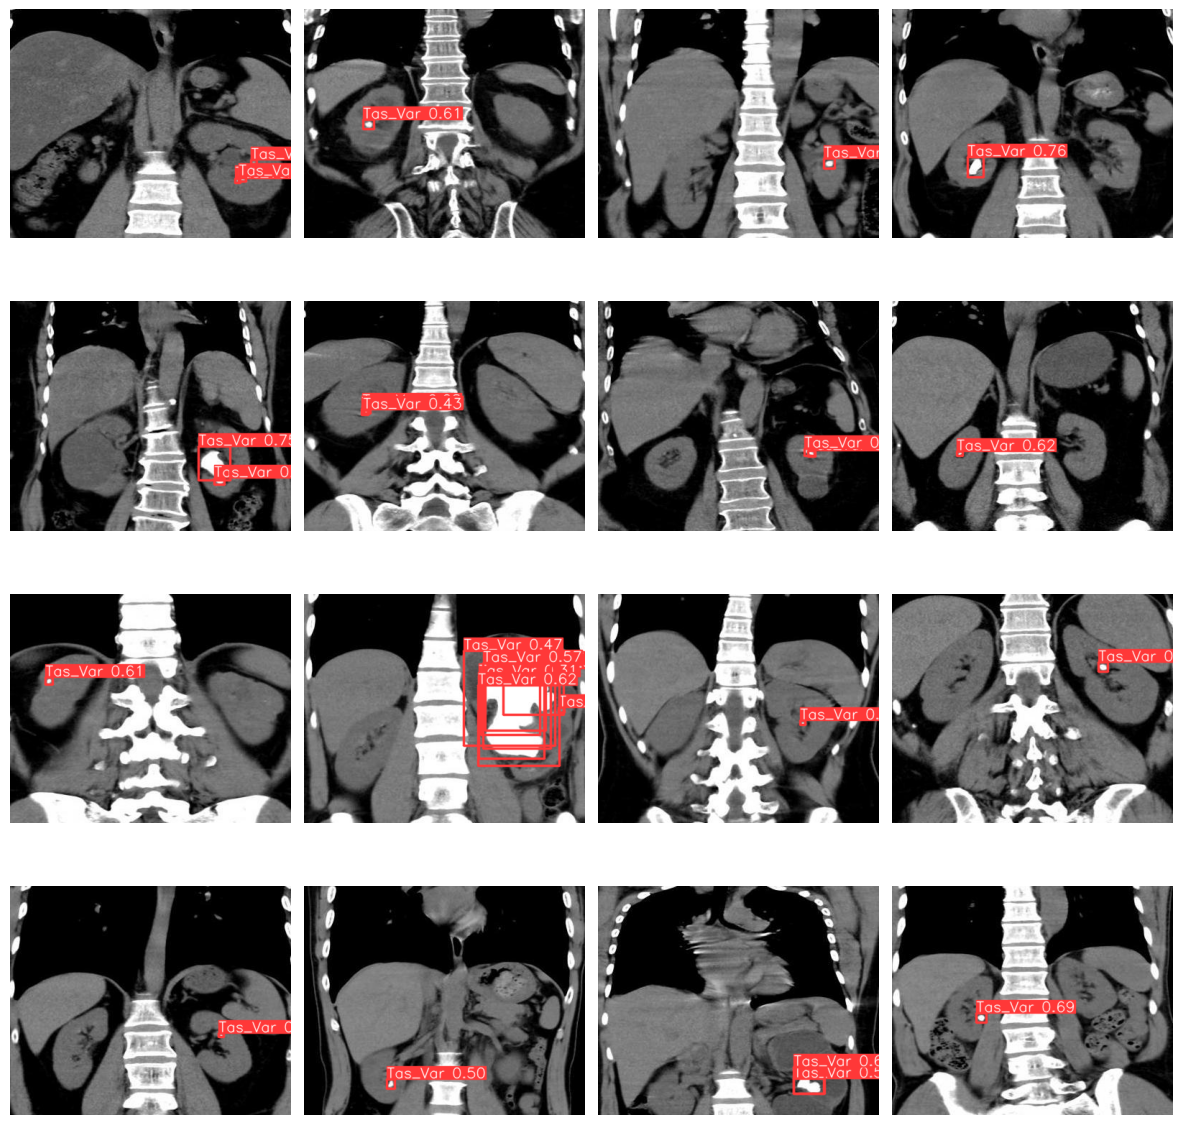

In [12]:
v8_trained = YOLO('/kaggle/working/ft_models/yolo_v8/weights/best.pt')
# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = stone_detection(img_path, v8_trained)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)


0: 544x640 4 Tas_Vars, 33.1ms
Speed: 2.0ms preprocess, 33.1ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 31.8ms
Speed: 2.1ms preprocess, 31.8ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 26.3ms
Speed: 2.6ms preprocess, 26.3ms inference, 1.0ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 26.3ms
Speed: 2.4ms preprocess, 26.3ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 Tas_Vars, 26.3ms
Speed: 2.6ms preprocess, 26.3ms inference, 1.8ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 Tas_Vars, 26.3ms
Speed: 1.9ms preprocess, 26.3ms inference, 1.0ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 26.2ms
Speed: 2.4ms preprocess, 26.2ms inference, 1.0ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 17.9ms
Speed: 1.8ms preprocess, 17.9ms inference, 1.0ms postprocess per image at shap

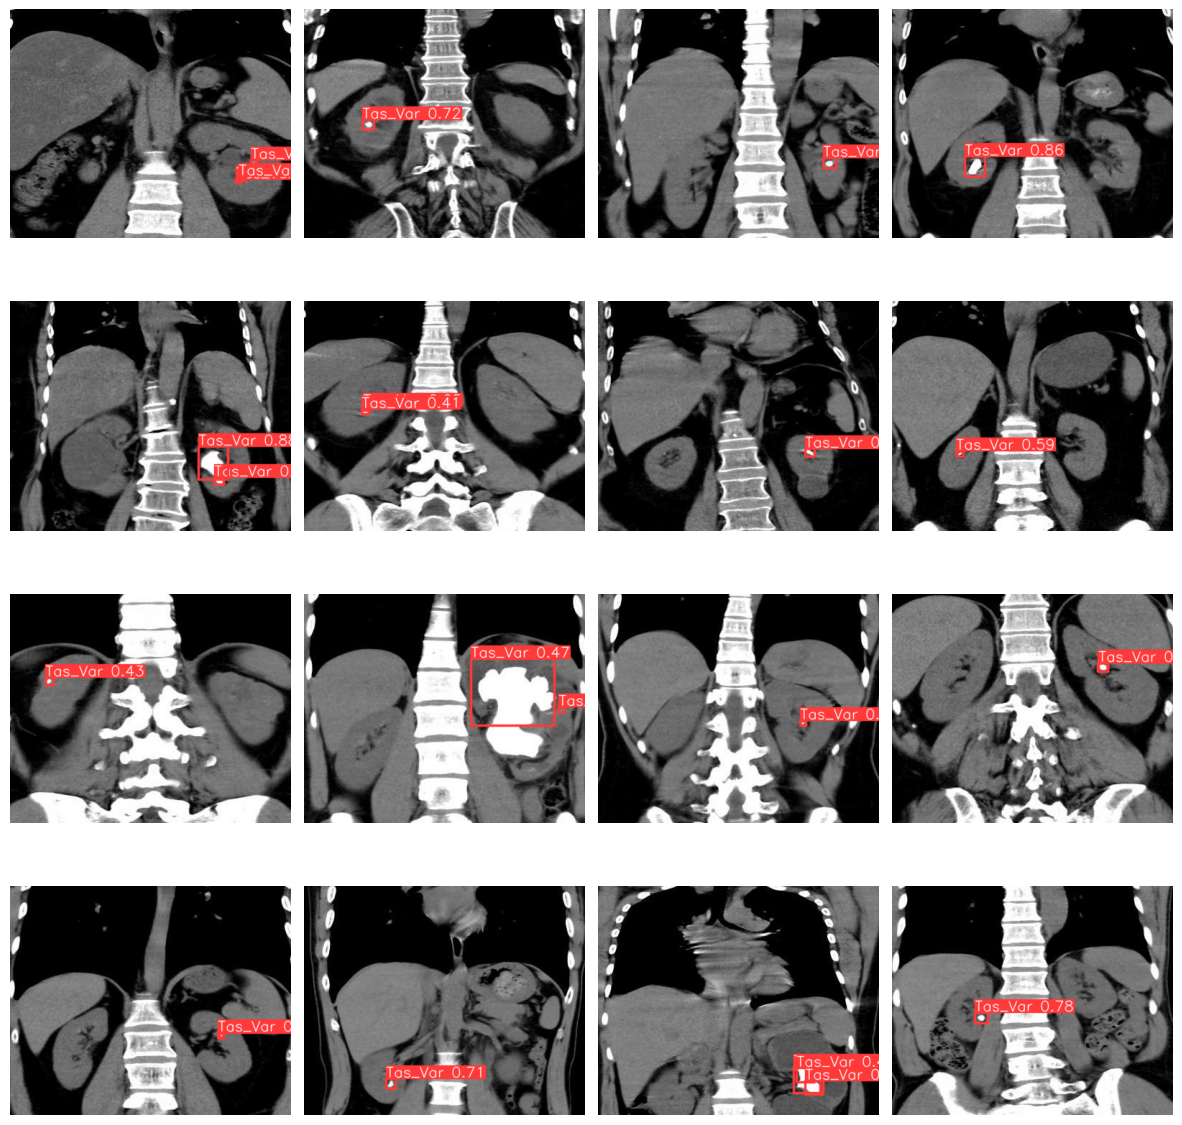

In [13]:
v10_trained = YOLOv10('/kaggle/working/ft_models/yolo_v10/weights/best.pt')
# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = stone_detection(img_path, v10_trained)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

In [14]:
v8_result = pd.read_csv('/kaggle/working/ft_models/yolo_v8/results.csv')
v8_result.head()

epoch        train/box_loss        train/cls_loss  \
0                     1                2.3040                3.0999   
1                     2                2.1542                1.2202   
2                     3                2.1344                1.1984   
3                     4                2.0988                1.1698   
4                     5                2.1086                1.2730   

         train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
0                1.3890               0.56544               0.49231   
1                1.3208               0.57979               0.53916   
2                1.3029               0.65950               0.59385   
3                1.2678               0.69111               0.50769   
4                1.2934               0.65934               0.58959   

       metrics/mAP50(B)   metrics/mAP50-95(B)          val/box_loss  \
0               0.49211               0.18823                2.1017   
1               0.46637               0.16922                2.1715   
2               0.58230               0.19705                2.0296   
3               0.54413               0.18886                2.1405   
4               0.62084               0.24169                2.0122   

           val/cls_loss          val/dfl_loss                lr/pg0  \
0                1.3610                1.2258              0.067500   
1                1.7033                1.2952              0.034487   
2                1.4532                1.2189              0.001461   
3                1.6166                1.2457              0.000941   
4                1.1275                1.1883              0.000941   

                 lr/pg1                lr/pg2  
0              0.000328              0.000328  
1              0.000649              0.000649  
2              0.000956              0.000956  
3              0.000941              0.000941  
4              0.000941              0.000941

In [15]:
v10_result = pd.read_csv('/kaggle/working/ft_models/yolo_v10/results.csv')
v10_result.head()

epoch          train/box_om          train/cls_om  \
0                     1                2.2859                2.3012   
1                     2                2.1767                1.2680   
2                     3                2.1245                1.2572   
3                     4                2.1435                1.1549   
4                     5                2.1027                1.1668   

           train/dfl_om          train/box_oo          train/cls_oo  \
0                1.4208                2.5836                2.9430   
1                1.3526                2.4851                1.4548   
2                1.3085                2.4404                1.3902   
3                1.3112                2.4486                1.3810   
4                1.3113                2.4131                1.3359   

           train/dfl_oo  metrics/precision(B)     metrics/recall(B)  \
0                1.2634               0.38072               0.35692   
1                1.2235               0.38923               0.37538   
2                1.2028               0.58825               0.52615   
3                1.2067               0.65162               0.58126   
4                1.2070               0.58636               0.51385   

       metrics/mAP50(B)   metrics/mAP50-95(B)            val/box_om  \
0               0.26061               0.09076                2.1323   
1               0.27738               0.06974                2.7211   
2               0.52396               0.18738                2.1094   
3               0.58245               0.20652                2.1190   
4               0.51465               0.18652                2.0960   

             val/cls_om            val/dfl_om            val/box_oo  \
0                1.6835                1.2920                2.4440   
1                2.4462                1.5628                2.8181   
2                1.3101                1.2701                2.4003   
3                1.2314                1.3058                2.3046   
4                1.5161                1.2287                2.3900   

             val/cls_oo            val/dfl_oo                lr/pg0  \
0                2.3942                1.1864              0.067500   
1                2.9405                1.2829              0.034487   
2                1.5206                1.2010              0.001461   
3                1.2462                1.1964              0.000941   
4                1.7624                1.1540              0.000941   

                 lr/pg1                lr/pg2  
0              0.000328              0.000328  
1              0.000649              0.000649  
2              0.000956              0.000956  
3              0.000941              0.000941  
4              0.000941              0.000941

In [16]:
v8_result.columns

Index(['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')

In [17]:
v10_result.columns

Index(['                  epoch', '           train/box_om',
       '           train/cls_om', '           train/dfl_om',
       '           train/box_oo', '           train/cls_oo',
       '           train/dfl_oo', '   metrics/precision(B)',
       '      metrics/recall(B)', '       metrics/mAP50(B)',
       '    metrics/mAP50-95(B)', '             val/box_om',
       '             val/cls_om', '             val/dfl_om',
       '             val/box_oo', '             val/cls_oo',
       '             val/dfl_oo', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')

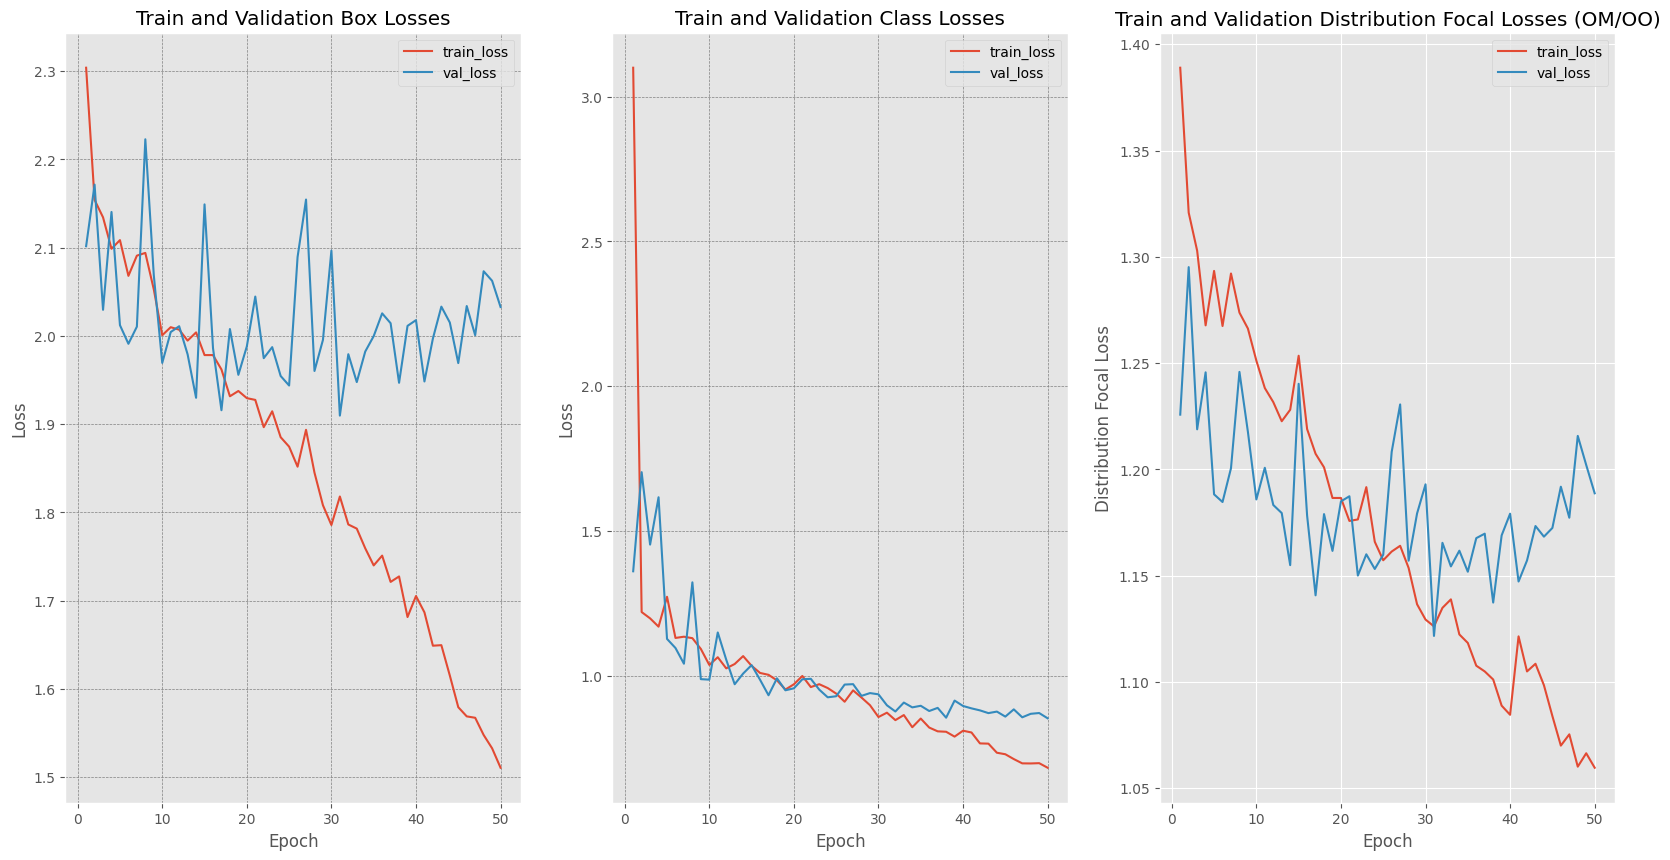

In [18]:
def show_v8_graphs(result):    
    result.columns = result.columns.str.strip()

    epoch_column = result['epoch']
    box_train_losses = result['train/box_loss']
    box_val_losses = result['val/box_loss']
    cls_train_losses = result['train/cls_loss']
    cls_val_losses = result['val/cls_loss']
    dfl_train_losses = result['train/dfl_loss']
    dfl_val_losses = result['val/dfl_loss']

    plt.figure(figsize=(20,10))
    plt.style.use('ggplot')  
    plt.subplot(1,3,1)
    plt.plot(epoch_column, box_train_losses, label='train_loss')
    plt.plot(epoch_column, box_val_losses, label='val_loss')
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train and Validation Box Losses')
    plt.legend()

    plt.subplot(1,3,2)
    plt.plot(epoch_column, cls_train_losses, label='train_loss')
    plt.plot(epoch_column, cls_val_losses, label='val_loss')
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train and Validation Class Losses')
    plt.legend()
    
    plt.subplot(1, 3, 3)
    plt.plot(epoch_column, dfl_train_losses, label='train_loss')
    plt.plot(epoch_column, dfl_val_losses, label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Distribution Focal Loss')
    plt.title('Train and Validation Distribution Focal Losses (OM/OO)')
    plt.legend()
    plt.show()
    
    
def show_v10_graphs(result):    
    result.columns = result.columns.str.strip()

    epoch_column = result['epoch']

    plt.figure(figsize=(20,10))
    plt.style.use('ggplot')  
    plt.subplot(1, 3, 1)
    plt.plot(epoch_column, result['train/box_om'], label='train_loss_om')
    plt.plot(epoch_column, result['train/box_oo'], label='train_loss_oo')
    plt.plot(epoch_column, result['val/box_om'], label='val_loss_om')
    plt.plot(epoch_column, result['val/box_oo'], label='val_loss_oo')
    plt.xlabel('Epoch')
    plt.ylabel('Box Loss')
    plt.title('Train and Validation Box Losses (OM/OO)')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    plt.plot(epoch_column, result['train/cls_om'], label='train_loss_om')
    plt.plot(epoch_column, result['train/cls_oo'], label='train_loss_oo')
    plt.plot(epoch_column, result['val/cls_om'], label='val_loss_om')
    plt.plot(epoch_column, result['val/cls_oo'], label='val_loss_oo')
    plt.xlabel('Epoch')
    plt.ylabel('Class Loss')
    plt.title('Train and Validation Class Losses (OM/OO)')
    plt.legend()
    
    plt.subplot(1, 3, 3)
    plt.plot(epoch_column, result['train/dfl_om'], label='train_loss_om')
    plt.plot(epoch_column, result['train/dfl_oo'], label='train_loss_oo')
    plt.plot(epoch_column, result['val/dfl_om'], label='val_loss_om')
    plt.plot(epoch_column, result['val/dfl_oo'], label='val_loss_oo')
    plt.xlabel('Epoch')
    plt.ylabel('Distribution Focal Loss')
    plt.title('Train and Validation Distribution Focal Losses (OM/OO)')
    plt.legend()
    plt.show()
    
show_v8_graphs(v8_result)

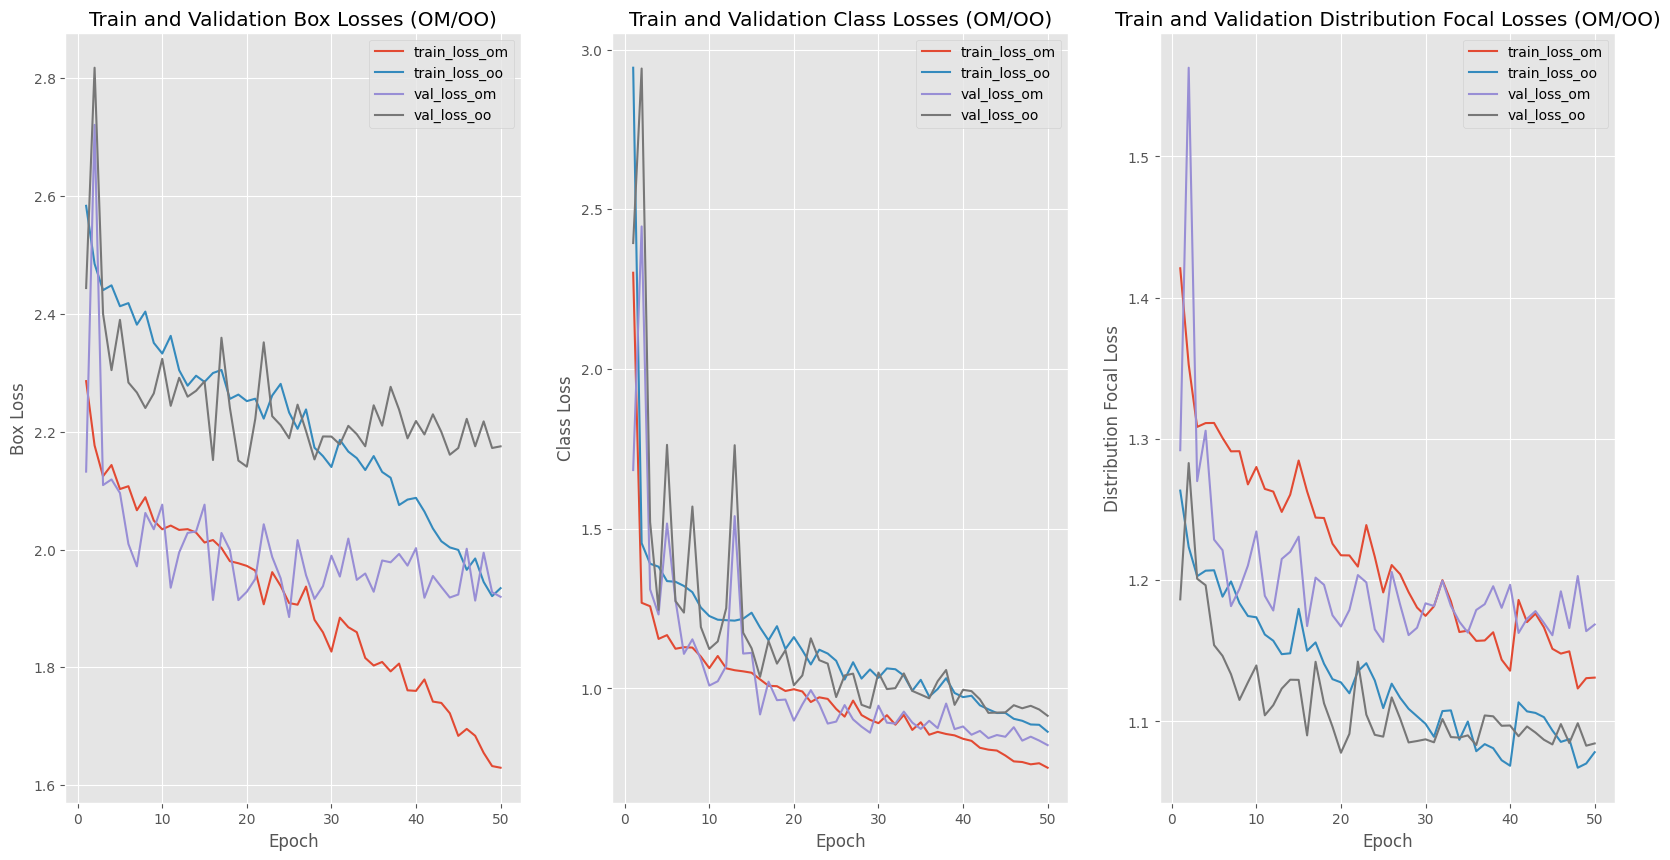

In [19]:
show_v10_graphs(v10_result)

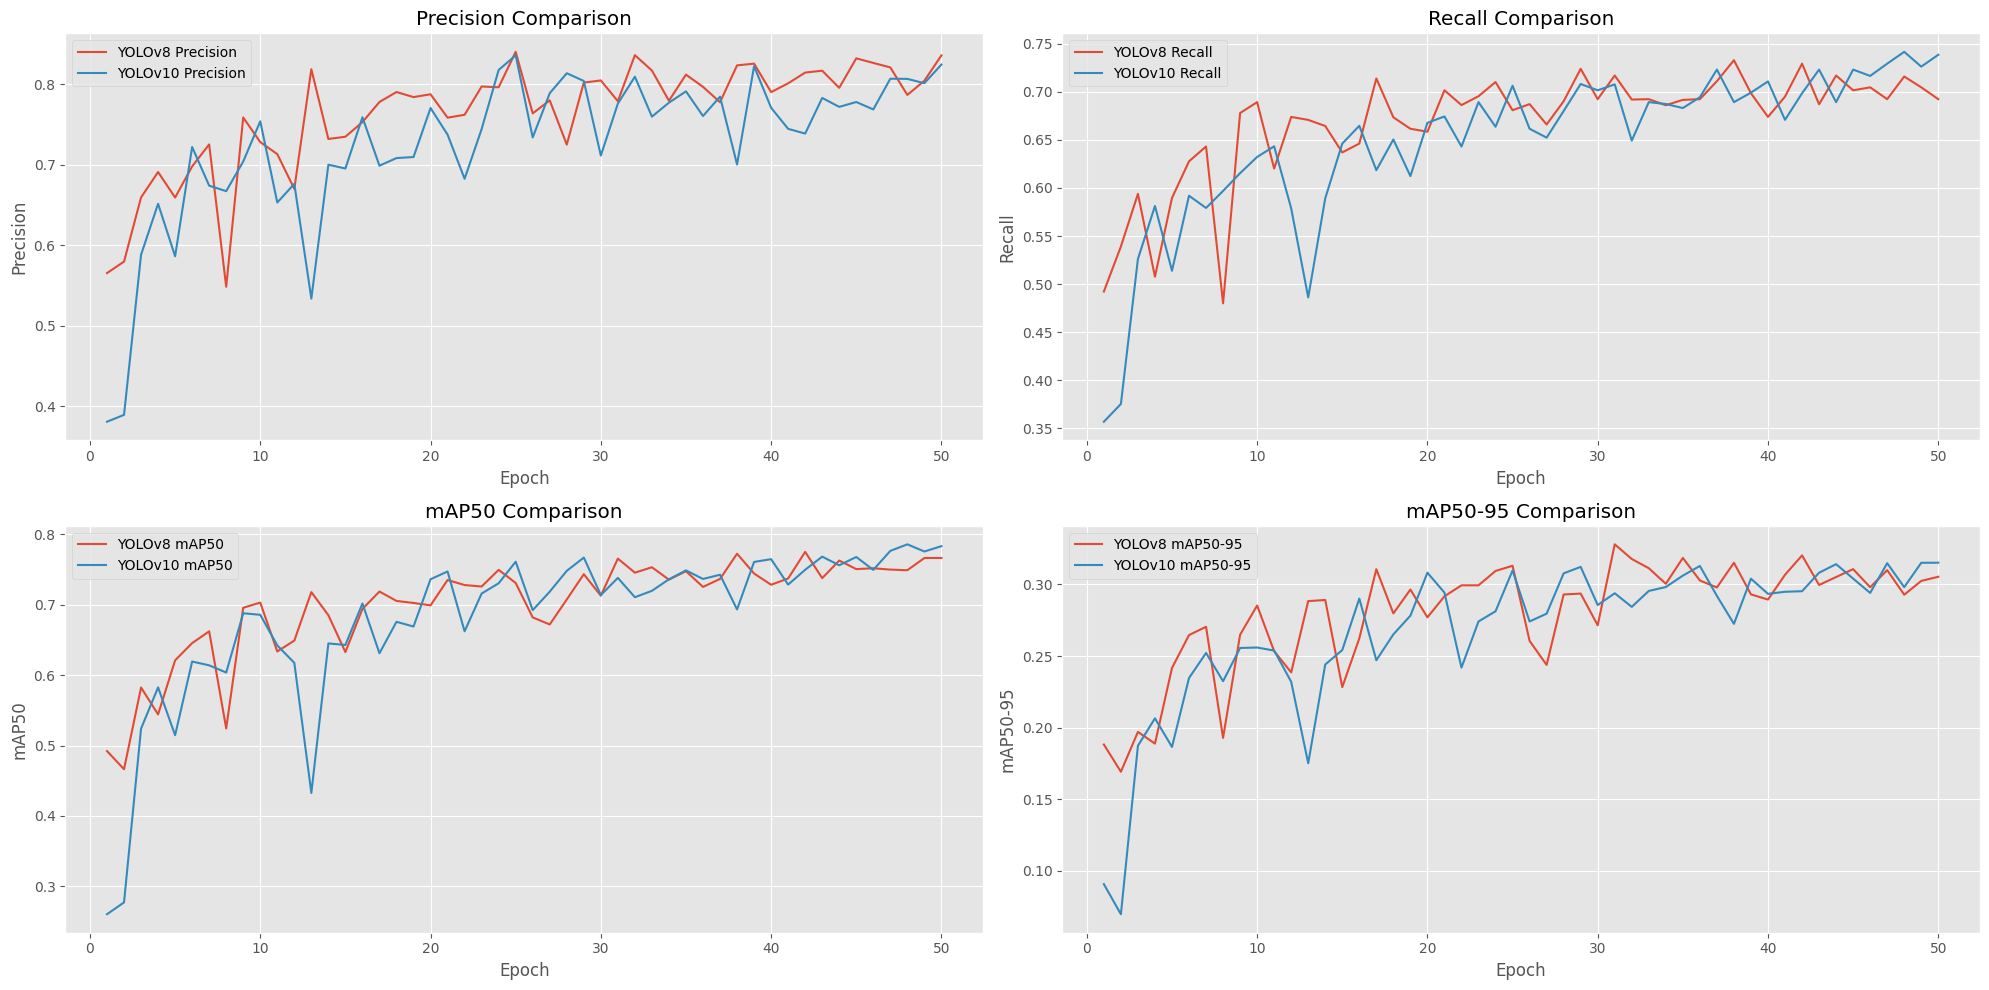

In [20]:
def plot_common_metrics(results_v8, results_v10):
    
    # Strip whitespace from column names
    results_v8.columns = results_v8.columns.str.strip()
    results_v10.columns = results_v10.columns.str.strip()
    
    # Select the relevant columns for comparison
    metrics_v8 = results_v8[['epoch', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']]
    metrics_v10 = results_v10[['epoch', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']]
    
    # Rename columns for clarity
    metrics_v8.columns = ['epoch', 'precision_v8', 'recall_v8', 'mAP50_v8', 'mAP50-95_v8']
    metrics_v10.columns = ['epoch', 'precision_v10', 'recall_v10', 'mAP50_v10', 'mAP50-95_v10']
    
    # Merge the dataframes on epoch
    comparison = pd.merge(metrics_v8, metrics_v10, on='epoch')
    
    # Plot the common metrics
    plt.figure(figsize=(20,10))
    plt.style.use('ggplot')  # You can choose a style you prefer
    
    plt.subplot(2, 2, 1)
    plt.plot(comparison['epoch'], comparison['precision_v8'], label='YOLOv8 Precision')
    plt.plot(comparison['epoch'], comparison['precision_v10'], label='YOLOv10 Precision')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.title('Precision Comparison')
    plt.legend()
    
    plt.subplot(2, 2, 2)
    plt.plot(comparison['epoch'], comparison['recall_v8'], label='YOLOv8 Recall')
    plt.plot(comparison['epoch'], comparison['recall_v10'], label='YOLOv10 Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.title('Recall Comparison')
    plt.legend()
    
    plt.subplot(2, 2, 3)
    plt.plot(comparison['epoch'], comparison['mAP50_v8'], label='YOLOv8 mAP50')
    plt.plot(comparison['epoch'], comparison['mAP50_v10'], label='YOLOv10 mAP50')
    plt.xlabel('Epoch')
    plt.ylabel('mAP50')
    plt.title('mAP50 Comparison')
    plt.legend()
    
    plt.subplot(2, 2, 4)
    plt.plot(comparison['epoch'], comparison['mAP50-95_v8'], label='YOLOv8 mAP50-95')
    plt.plot(comparison['epoch'], comparison['mAP50-95_v10'], label='YOLOv10 mAP50-95')
    plt.xlabel('Epoch')
    plt.ylabel('mAP50-95')
    plt.title('mAP50-95 Comparison')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
plot_common_metrics(v8_result, v10_result)

(-0.5, 2399.5, 1199.5, -0.5)

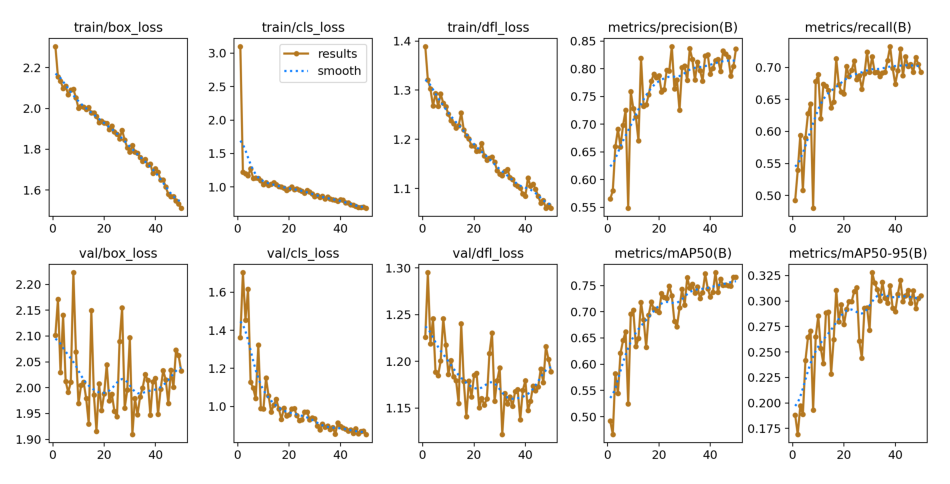

In [21]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.imread('/kaggle/working/ft_models/yolo_v8/results.png'))
plt.axis('off')

(-0.5, 2399.5, 1199.5, -0.5)

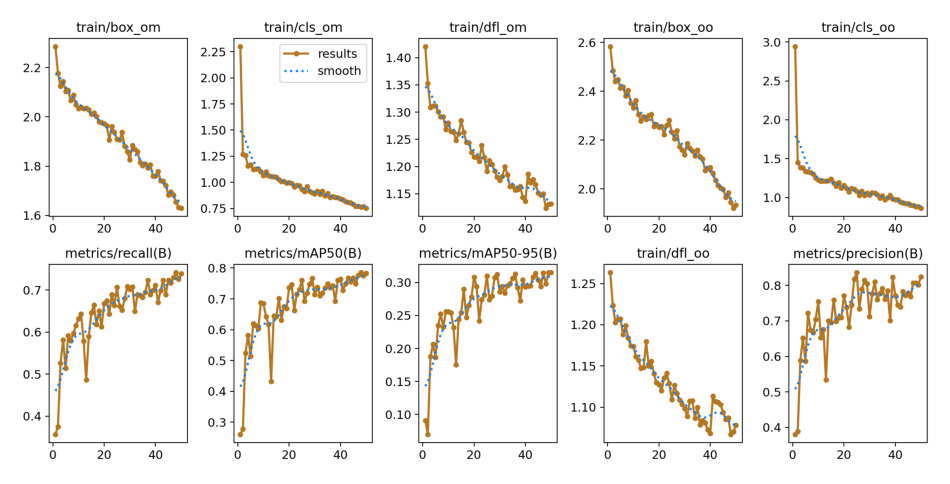

In [22]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.imread('/kaggle/working/ft_models/yolo_v10/results.png'))
plt.axis('off')

## **Precision-Recall Curves**


(-0.5, 2249.5, 1499.5, -0.5)

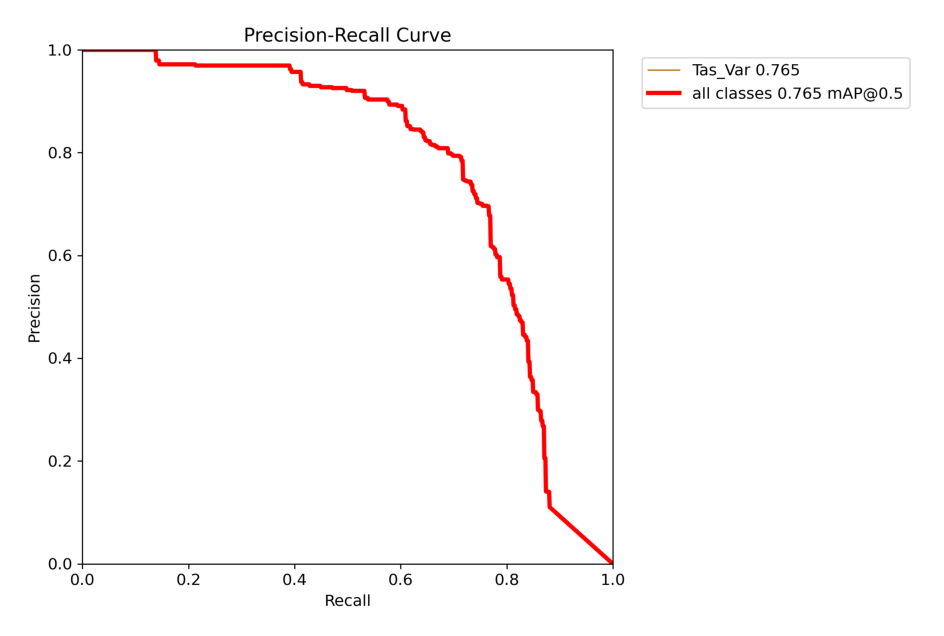

In [23]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.imread('/kaggle/working/ft_models/yolo_v8/PR_curve.png'))
plt.axis('off')

(-0.5, 2249.5, 1499.5, -0.5)

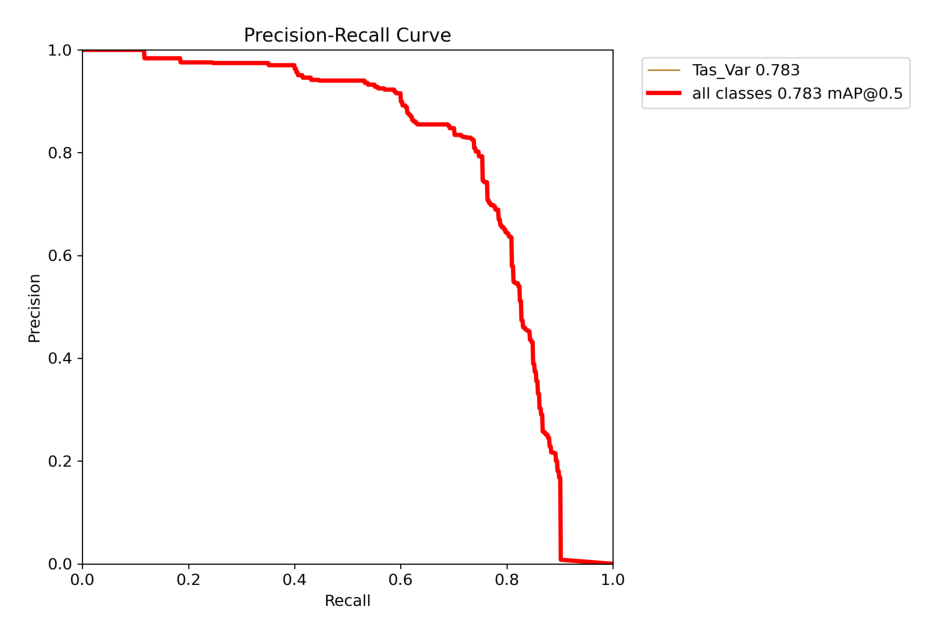

In [24]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.imread('/kaggle/working/ft_models/yolo_v10/PR_curve.png'))
plt.axis('off')